In [1]:
push!(LOAD_PATH, join(["/home/juser/Seismic" "/src"]))
using Seismic

INFO: Loading help data...


Figure(PyObject <matplotlib.figure.Figure object at 0x7fdf69ea0c50>)

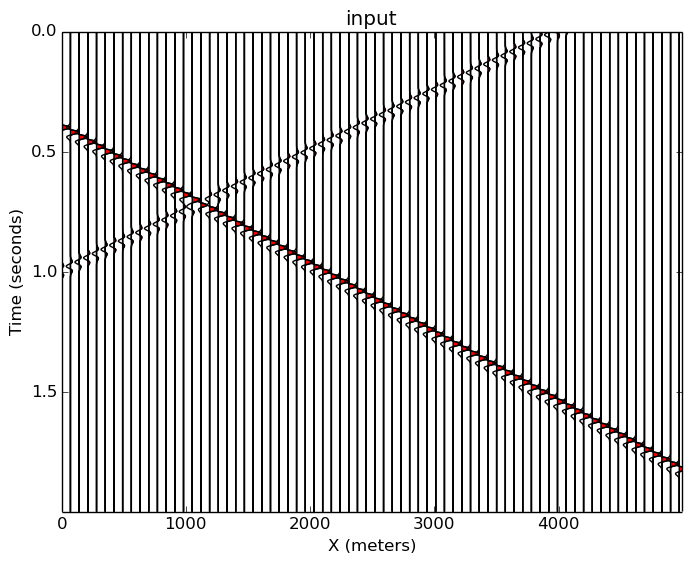

In [5]:
# generate synthetic 2d data consisting of linear events
# ======================================================
param = ["nt"=>500,"nx1"=>500,
	 "tau1"=>[0.4 1.0],"tau2"=>[0. 0.],"tau3"=>[0. 0.],"tau4"=>[0. 0.],
	 "v1"=>[3500. -4000],"v2"=>[99999. 99999.],"v3"=>[99999. 99999.],"v4"=>[99999. 99999.],
     "amp"=>[1. -0.5], "f0"=>[20. 20.]];

d = SeisLinearEvents(param);

# Make some headers 
nt = size(d,1); nx = convert(Int64,length(d[:])/nt);
h = Array(Header,nx);
for ix = 1:nx
  h[ix] = Seismic.InitSeisHeader();
  h[ix].tracenum = ix;
  h[ix].d1 = 0.004;
  h[ix].n1 = nt;
  h[ix].imx = ix;
  h[ix].imy = 0;
  h[ix].ihx = 0;
  h[ix].ihy = 0;
end

plotpar = ["style"=>"wiggles",
           "wiggle_trace_increment"=>7,
           "wiggle_fill_color"=>"r",
           "wiggle_line_color"=>"k",
           "xcur"=>1.2,
           "vmin"=>-2,"vmax"=>2,
           "aspect"=>"auto",
           "xlabel"=>"X","xunits"=>"meters","ox"=>0,"dx"=>10,
           "ylabel"=>"Time","yunits"=>"seconds","oy"=>0,"dy"=>0.004,
           "wbox"=>10,"hbox"=>5,
           "cmap"=>"seismic"];

plotpar["title"]="input";
SeisPlot(d[:,:],plotpar);

Figure(PyObject <matplotlib.figure.Figure object at 0x7fdf69e66bd0>)

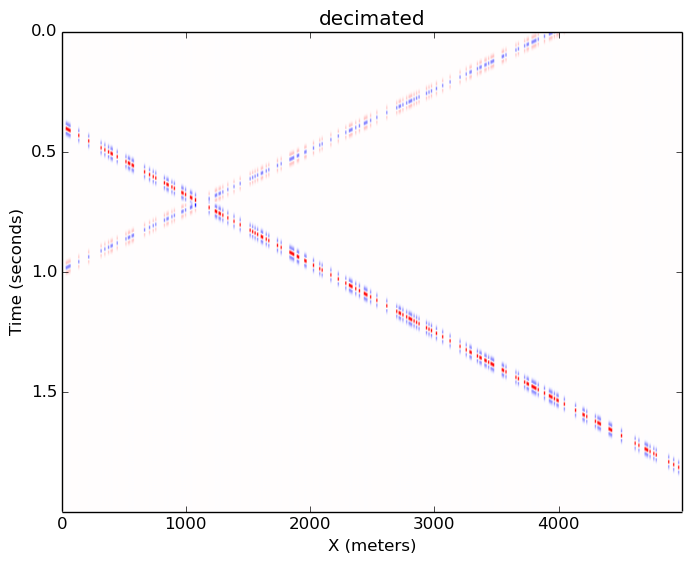

In [3]:
ddec,h = SeisDecimate(d,h,["mode"=>"random","perc"=>70])
plotpar["title"]="decimated";
SeisPlot(ddec[:,:],plotpar);

Figure(PyObject <matplotlib.figure.Figure object at 0x7fdfa75ce950>)

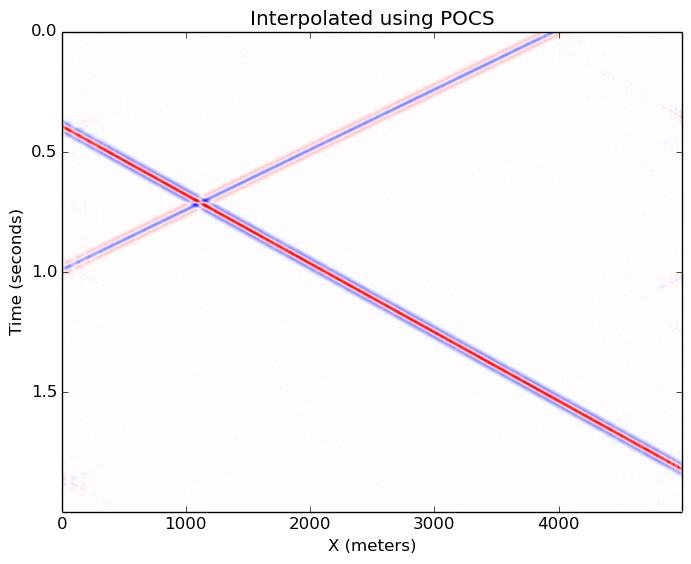

In [4]:
param = ["style"=>"mxmyhxhy","Niter"=> 100,"fmax"=>80]
dpocs,h = SeisPOCS(ddec,h,param)
plotpar["title"]="Interpolated using POCS";
SeisPlot(dpocs[:,:],plotpar);